## Web Crawling - pandas

- Wikipedia Demographics of Australia
- https://en.wikipedia.org/wiki/Demographics_of_Australia#:~:text=The%20population%20of%20Australia%20is,the%20most%20populous%20Oceanian%20country.

In [1]:
import pandas as pd

In [98]:
url = "https://en.wikipedia.org/wiki/Demographics_of_Australia#:~:text=The%20population%20of%20Australia%20is,the%20most%20populous%20Oceanian%20country."
table = pd.read_html(url)

In [99]:
df = table[14]
df.shape

(123, 11)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                123 non-null    object 
 1   Population                          123 non-null    object 
 2   Live births                         123 non-null    object 
 3   Deaths                              123 non-null    int64  
 4   Natural change                      123 non-null    int64  
 5   Crude birth rate (per 1,000)        123 non-null    float64
 6   Crude death rate (per 1,000)        123 non-null    float64
 7   Natural change (per 1,000)          123 non-null    float64
 8   Crude migration change (per 1,000)  122 non-null    float64
 9   Total fertility rates[A][62]        123 non-null    float64
 10  Net overseas migration[71][72][73]  41 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usa

In [100]:
df.head()

,Unnamed: 0,"Average population (June 1, form 2017 Dec 31)",Live births,Deaths,Natural change,"Crude birth rate (per 1,000)","Crude death rate (per 1,000)","Natural change (per 1,000)","Crude migration change (per 1,000)",Total fertility rates[A][62],Net overseas migration[71][72][73]
0,1900,3715000,102221,44060,58161,27.3,11.8,15.5,NaN,3.66,NaN
1,1901,3765000,102945,46330,56615,27.1,12.2,14.9,-1.6,3.64,NaN
2,1902,3824000,102776,48078,54698,26.7,12.5,14.2,1.4,3.39,NaN
3,1903,3875000,98443,47293,51150,25.3,12.1,13.2,12.0,3.58,NaN
4,1904,3916000,104113,43572,60541,26.4,11.0,15.4,-4.9,3.54,NaN


In [101]:
df.rename(columns={'Unnamed: 0':'Year', 'Average population (June 1, form 2017 Dec 31)':'Population'}, inplace=True)

In [102]:
df[df['Year']=='2016[75]']

,Year,Population,Live births,Deaths,Natural change,"Crude birth rate (per 1,000)","Crude death rate (per 1,000)","Natural change (per 1,000)","Crude migration change (per 1,000)",Total fertility rates[A][62],Net overseas migration[71][72][73]
116,2016[75],24385600,311800,157400,154400,12.9,6.5,6.4,10.2,1.789,243800.0


In [120]:
df['Year'] = df['Year'].str.split('[', expand=True)[0]
df['Population'] = df['Population'].str.split('[', expand=True)[0].str.split('(', expand=True)[0].str.replace(',','')
df['Live births'] = df['Live births'].str.split('[', expand=True)[0].str.split('(', expand=True)[0].str.replace(',','')

In [122]:
df.tail(10)

,Year,Population,Live births,Deaths,Natural change,"Crude birth rate (per 1,000)","Crude death rate (per 1,000)","Natural change (per 1,000)","Crude migration change (per 1,000)",Total fertility rates[A][62],Net overseas migration[71][72][73]
113,2013,23128100,311100,149200,161900,13.3,6.4,6.9,10.4,1.880,235797.0
114,2014,23475700,307000,150000,157000,12.8,6.5,6.3,8.3,1.800,179000.0
115,2015,23816000,307700,155900,151800,12.8,6.7,6.1,8.1,1.810,181000.0
116,2016,24385600,311800,157400,154400,12.9,6.5,6.4,10.2,1.789,243800.0
117,2017,24770700,308500,160300,148200,12.7,6.6,6.1,9.7,1.741,241700.0
118,2018,25180200,314900,158500,156400,12.7,6.4,6.3,10.2,1.740,248400.0
119,2019,25522169,305800,166700,139100,12.1,6.6,5.5,8.1,1.657,210700.0
120,2020,25694400,294400,161400,133000,11.5,6.3,5.2,1.5,1.581,3300.0
121,2021,25766605,309996,171469,138527,12.1,6.7,5.4,-2.6,1.700,-3600.0
122,2022,26268359,300684,190745,109800,11.6,7.3,4.3,15.2,1.630,387000.0


In [134]:
df['Year'] = df['Year'].astype('int64')
df['Population'] = df['Population'].astype('int64')
df['Live births'] = df['Live births'].astype('int64')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                123 non-null    int64  
 1   Population                          123 non-null    int64  
 2   Live births                         123 non-null    int64  
 3   Deaths                              123 non-null    int64  
 4   Natural change                      123 non-null    int64  
 5   Crude birth rate (per 1,000)        123 non-null    float64
 6   Crude death rate (per 1,000)        123 non-null    float64
 7   Natural change (per 1,000)          123 non-null    float64
 8   Crude migration change (per 1,000)  122 non-null    float64
 9   Total fertility rates[A][62]        123 non-null    float64
 10  Net overseas migration[71][72][73]  41 non-null     float64
dtypes: float64(6), int64(5)
memory usage: 10.7 KB

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font="AppleGothic")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

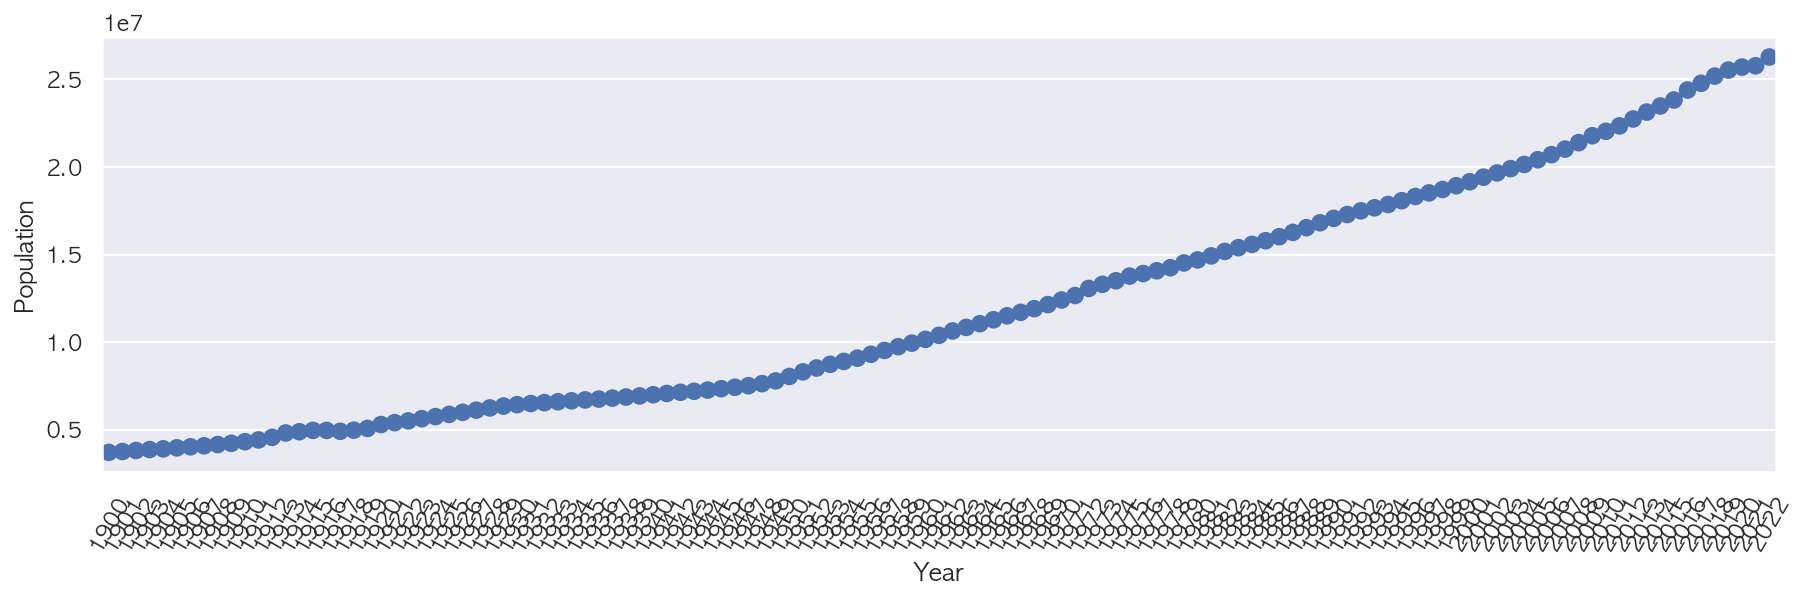

In [138]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=60)
sns.pointplot(data=df, x="Year", y="Population")

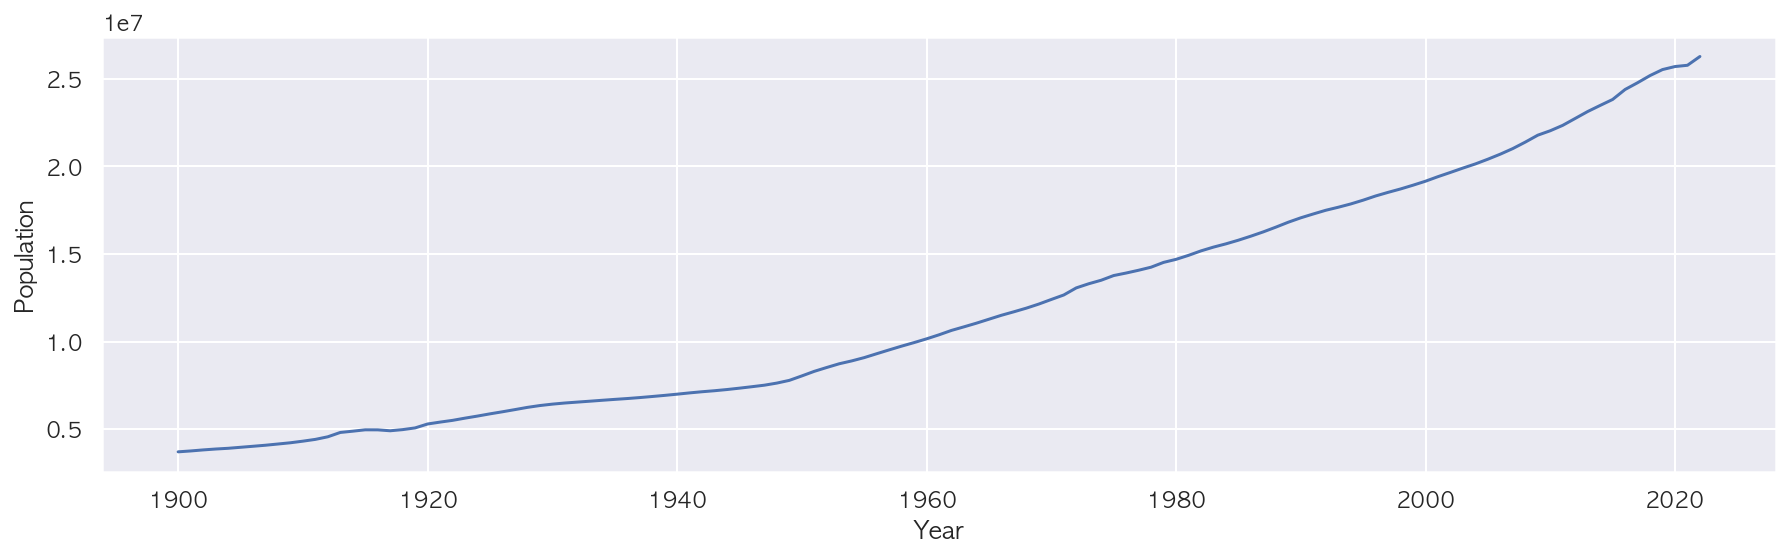

In [140]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x="Year", y="Population")

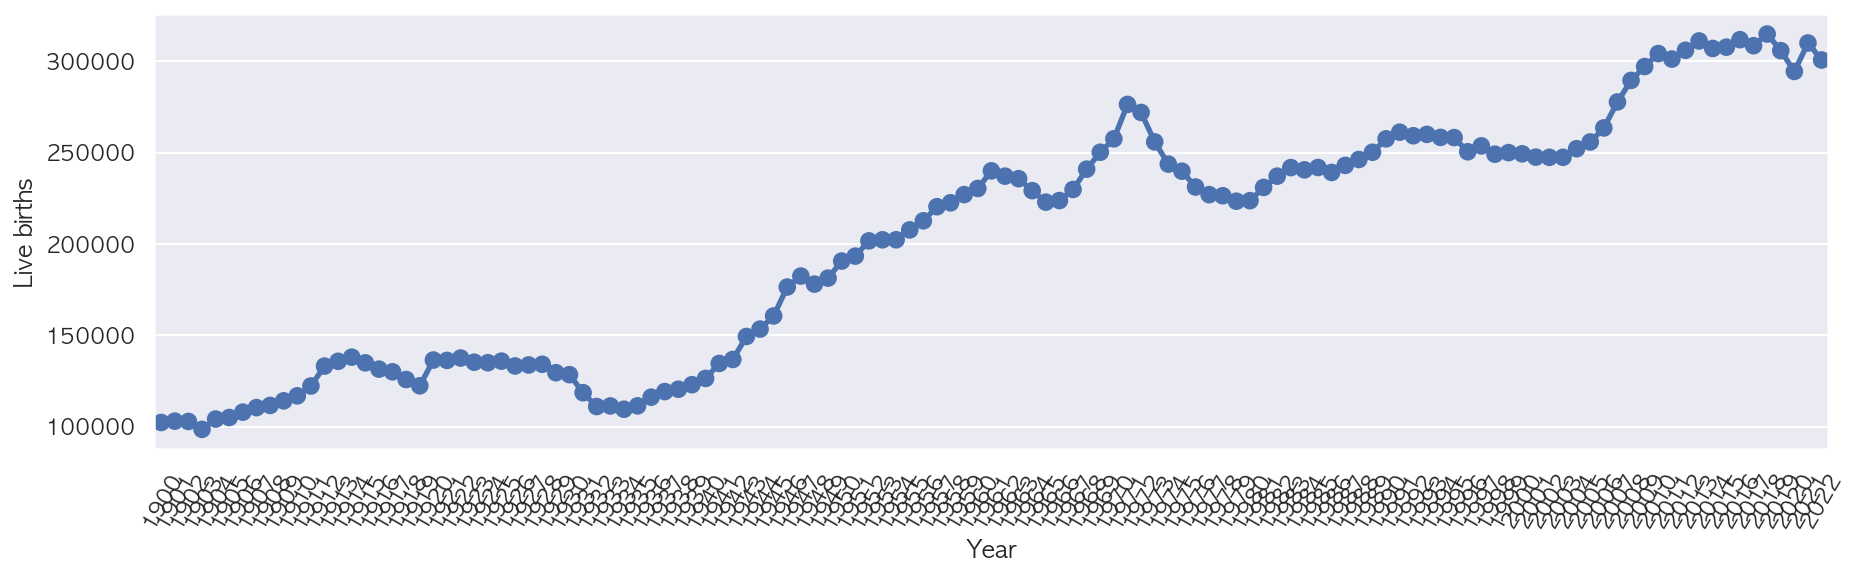

In [141]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=60)
sns.pointplot(data=df, x="Year", y="Live births")

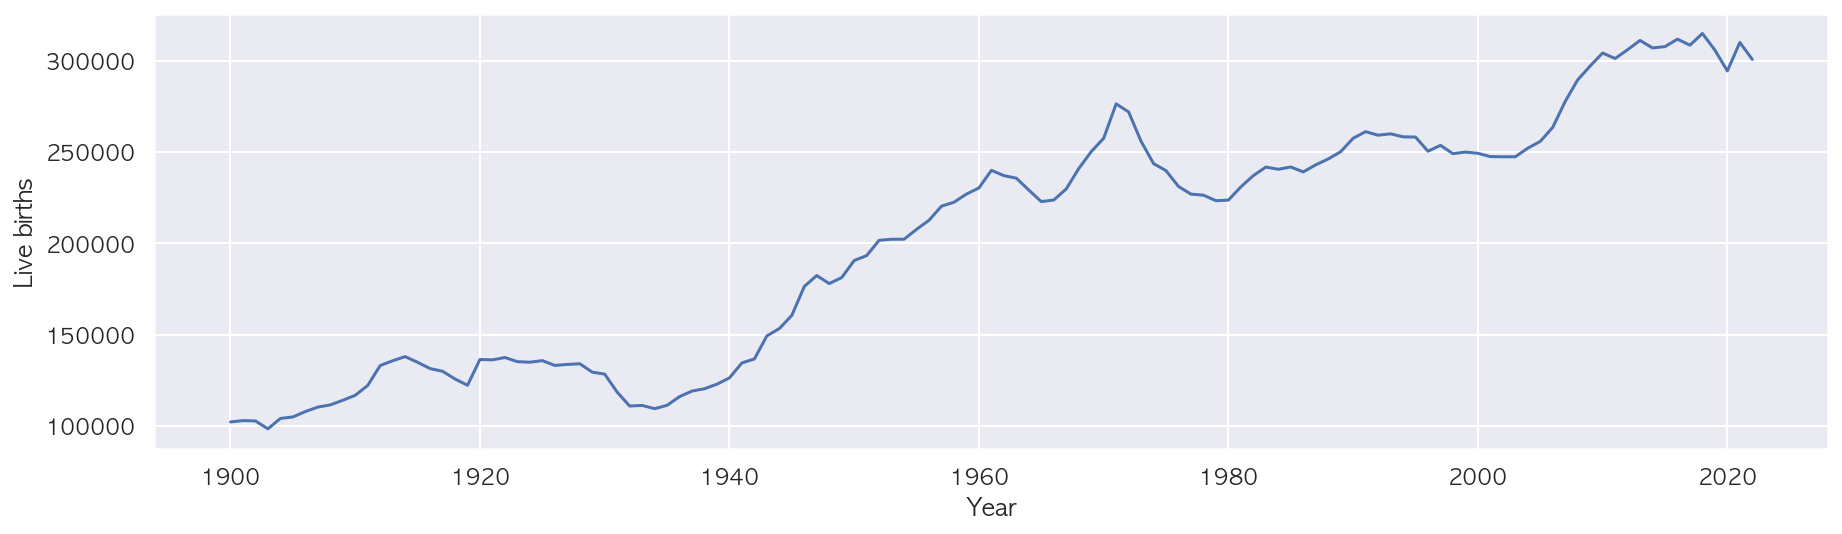

In [142]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x="Year", y="Live births")

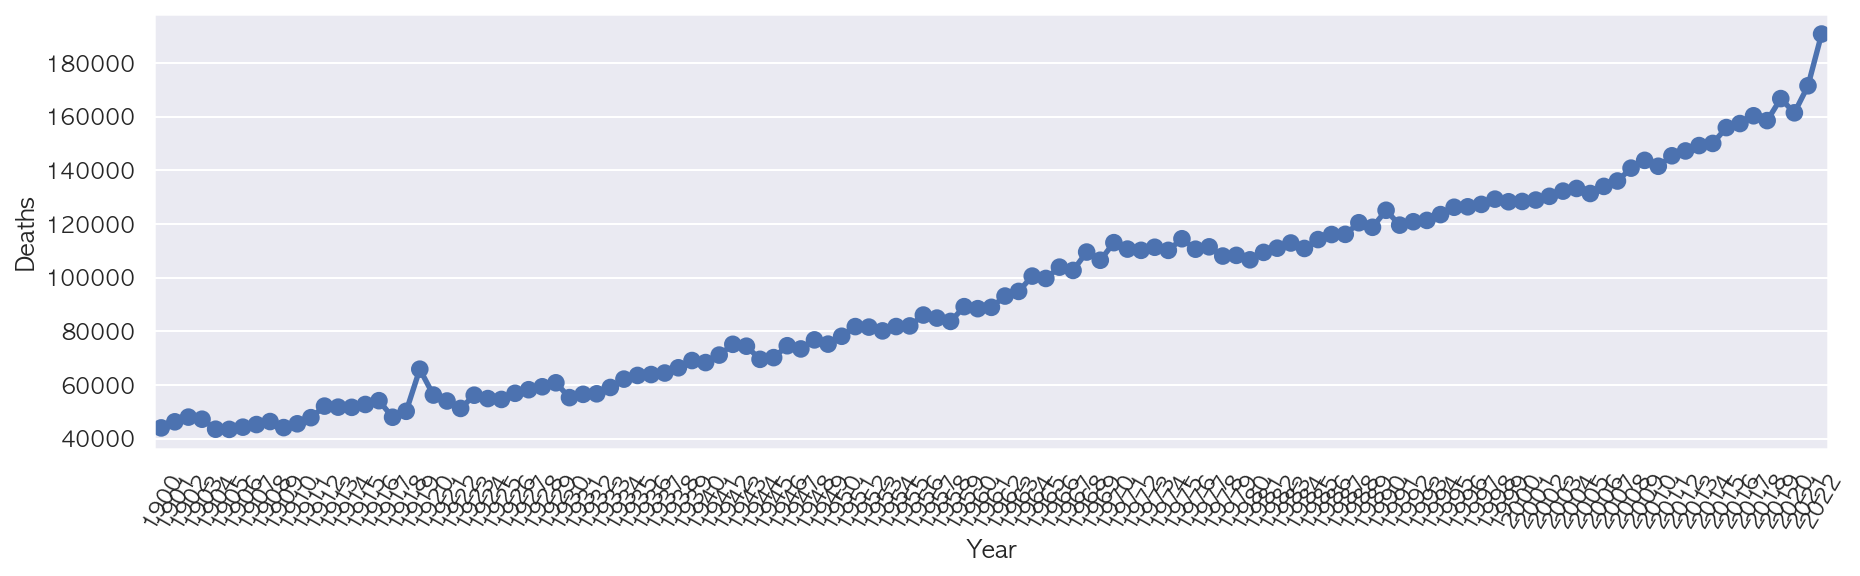

In [143]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=60)
sns.pointplot(data=df, x="Year", y="Deaths")

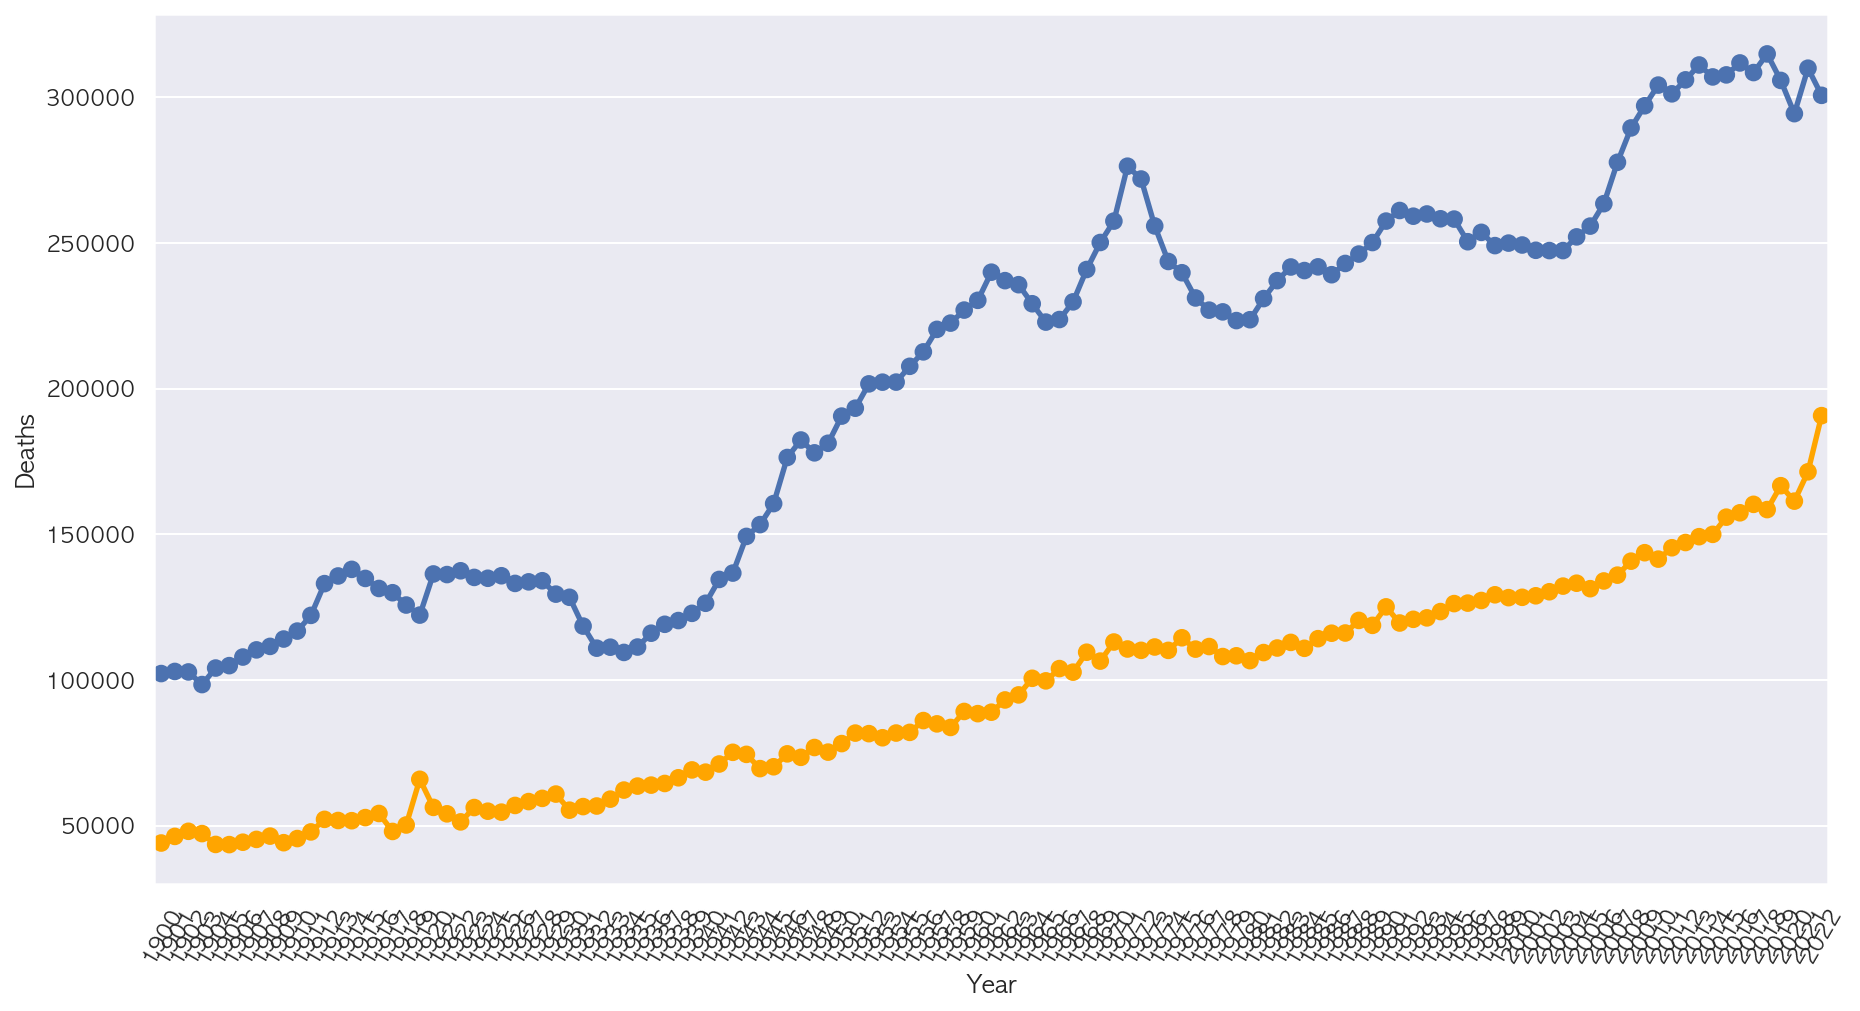

In [144]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=60)
sns.pointplot(data=df, x="Year", y="Live births")
sns.pointplot(data=df, x="Year", y="Deaths", color='orange')

In [145]:
df_pop = df[['Year', 'Live births', 'Deaths']]
df_pop = df_pop.set_index('Year')
df_pop.head()

,Live births,Deaths
Year,,
1900,102221,44060
1901,102945,46330
1902,102776,48078
1903,98443,47293
1904,104113,43572


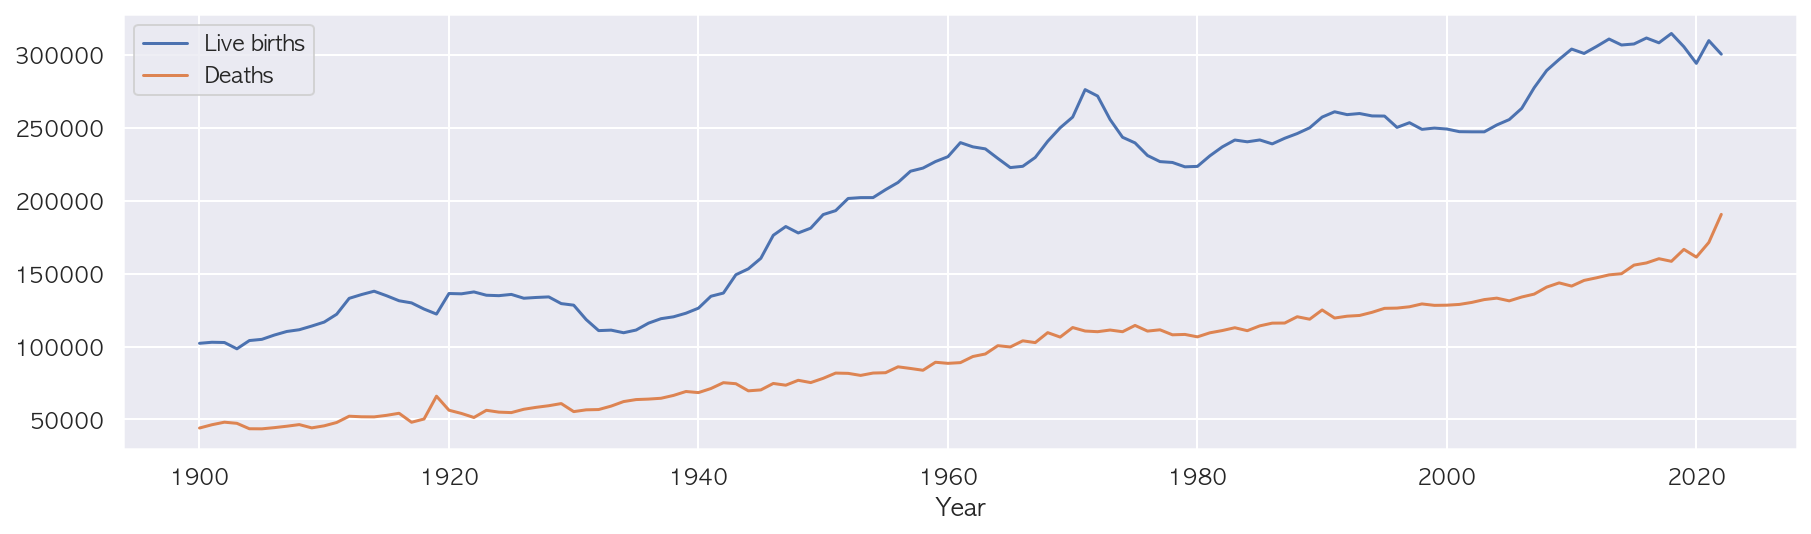

In [146]:
df_pop.plot(figsize=(15, 4))

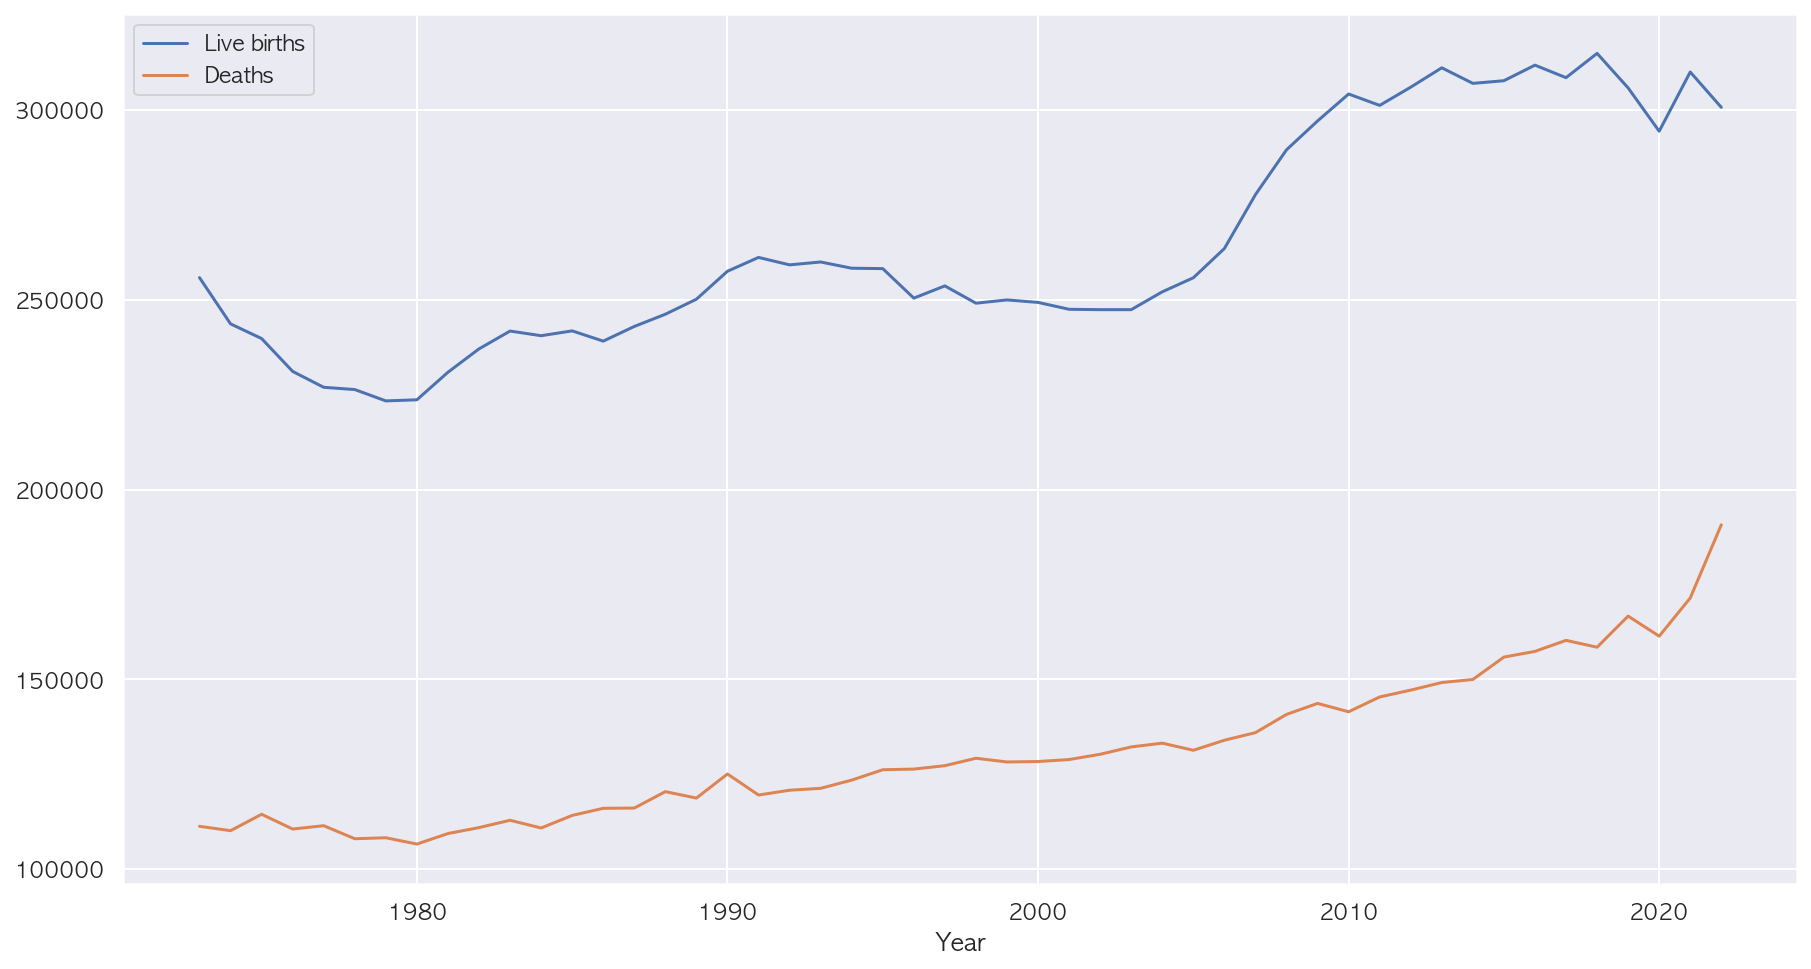

In [147]:
df_pop[-50:].plot(figsize=(15, 8))

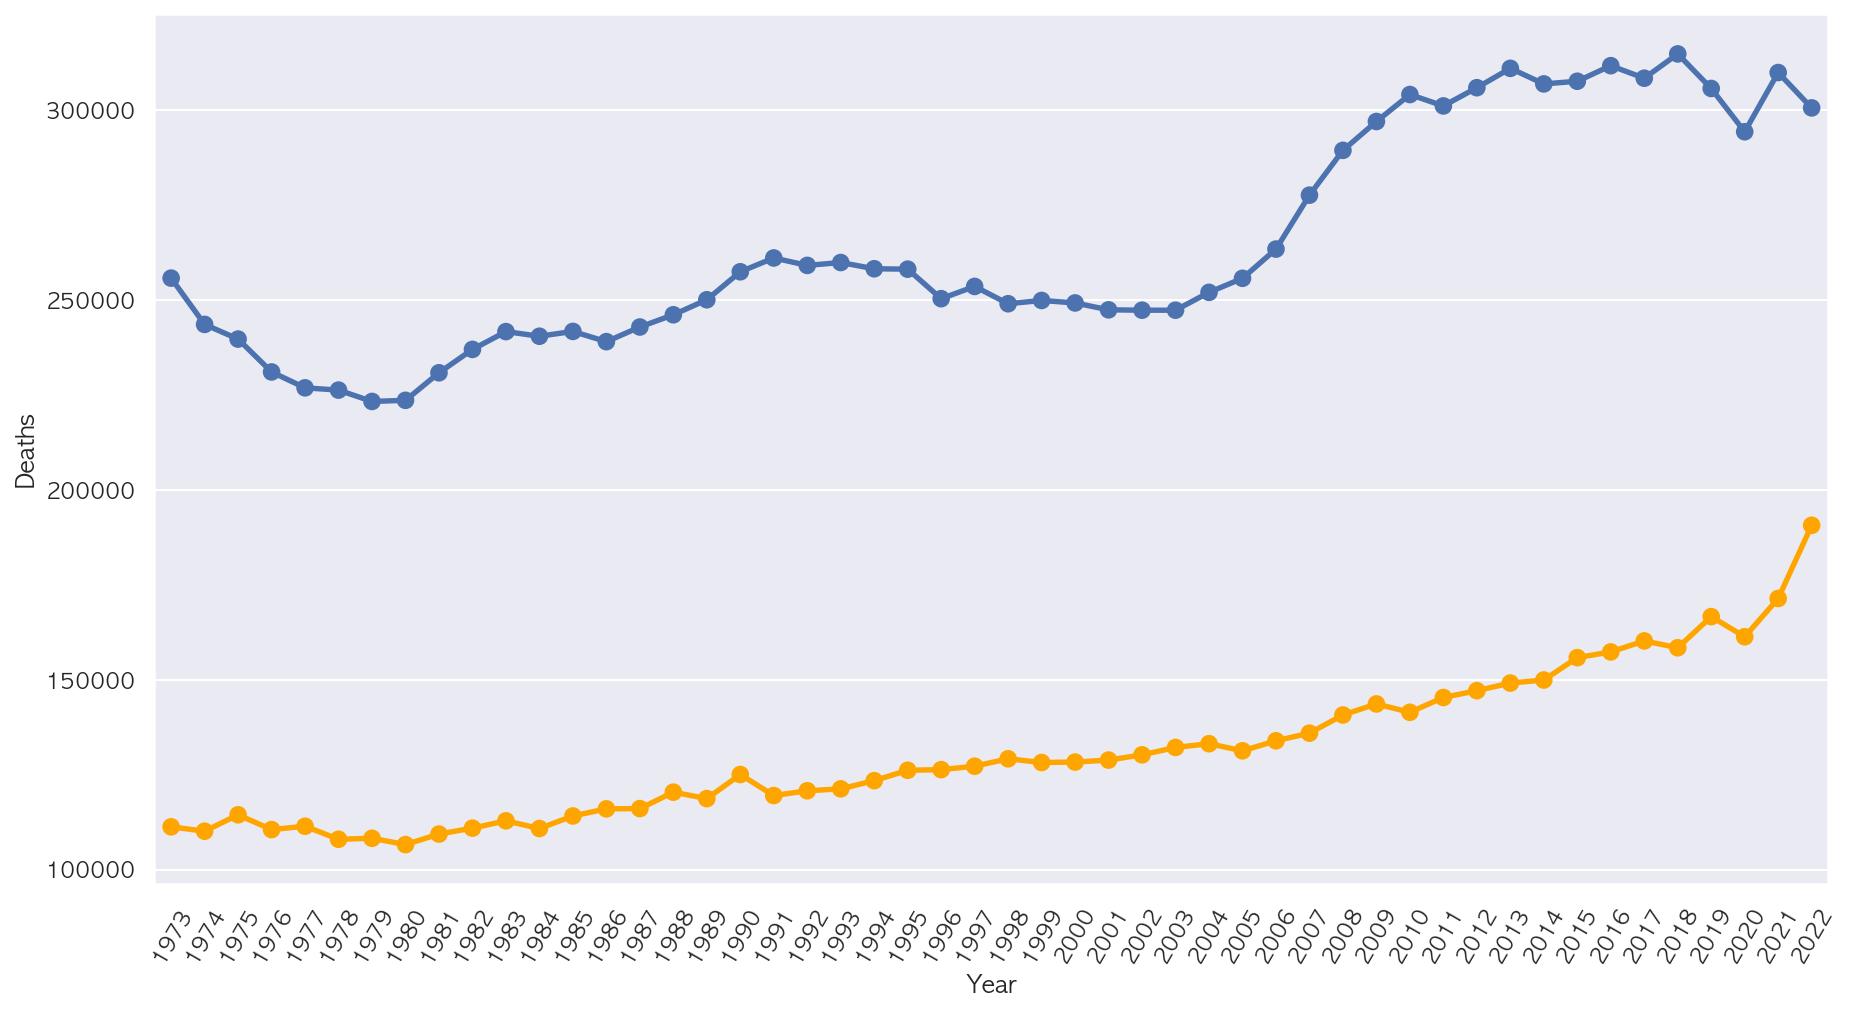

In [148]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=60)
sns.pointplot(data=df[-50:], x="Year", y="Live births")
sns.pointplot(data=df[-50:], x="Year", y="Deaths", color='orange')

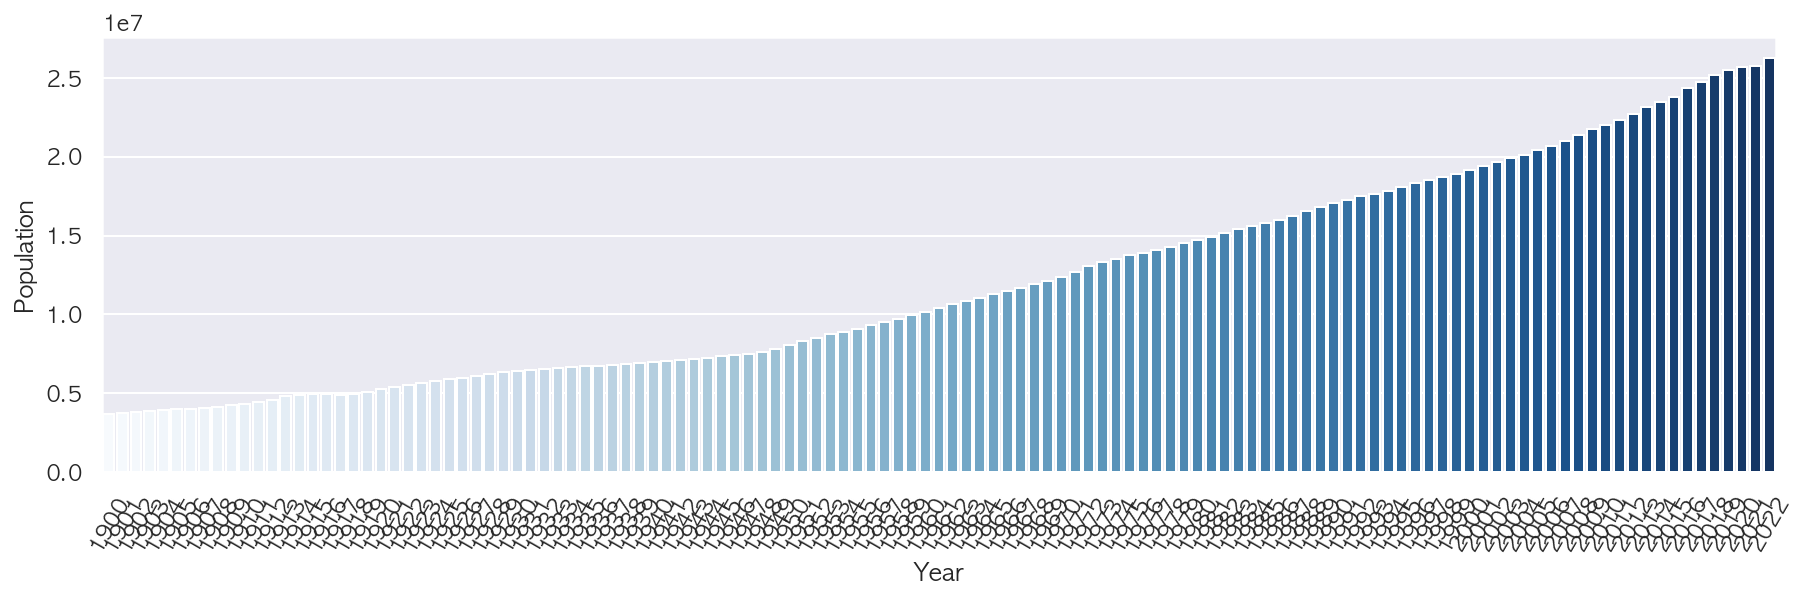

In [150]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=60)
sns.barplot(data=df, x='Year', y='Population', palette='Blues')

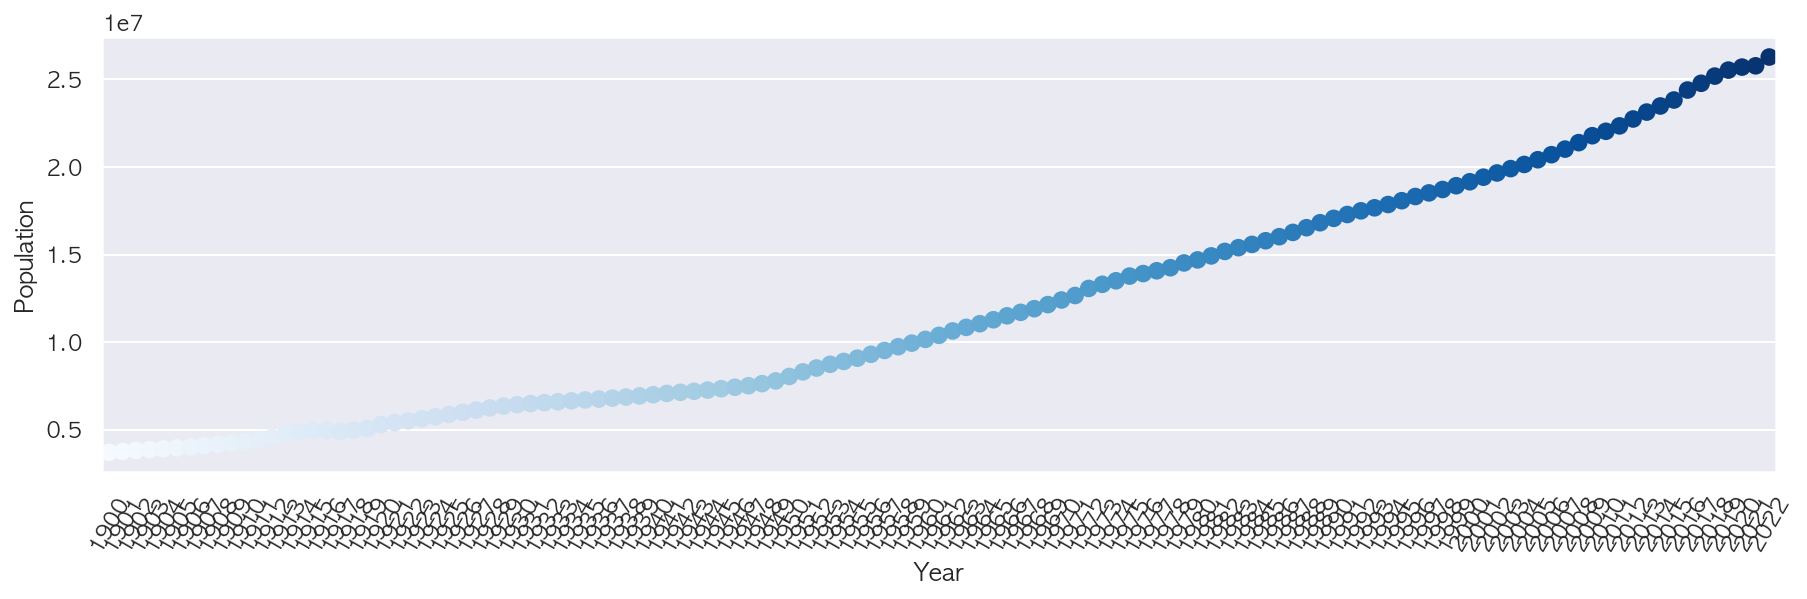

In [151]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=60)
sns.pointplot(data=df, x='Year', y='Population', palette='Blues')

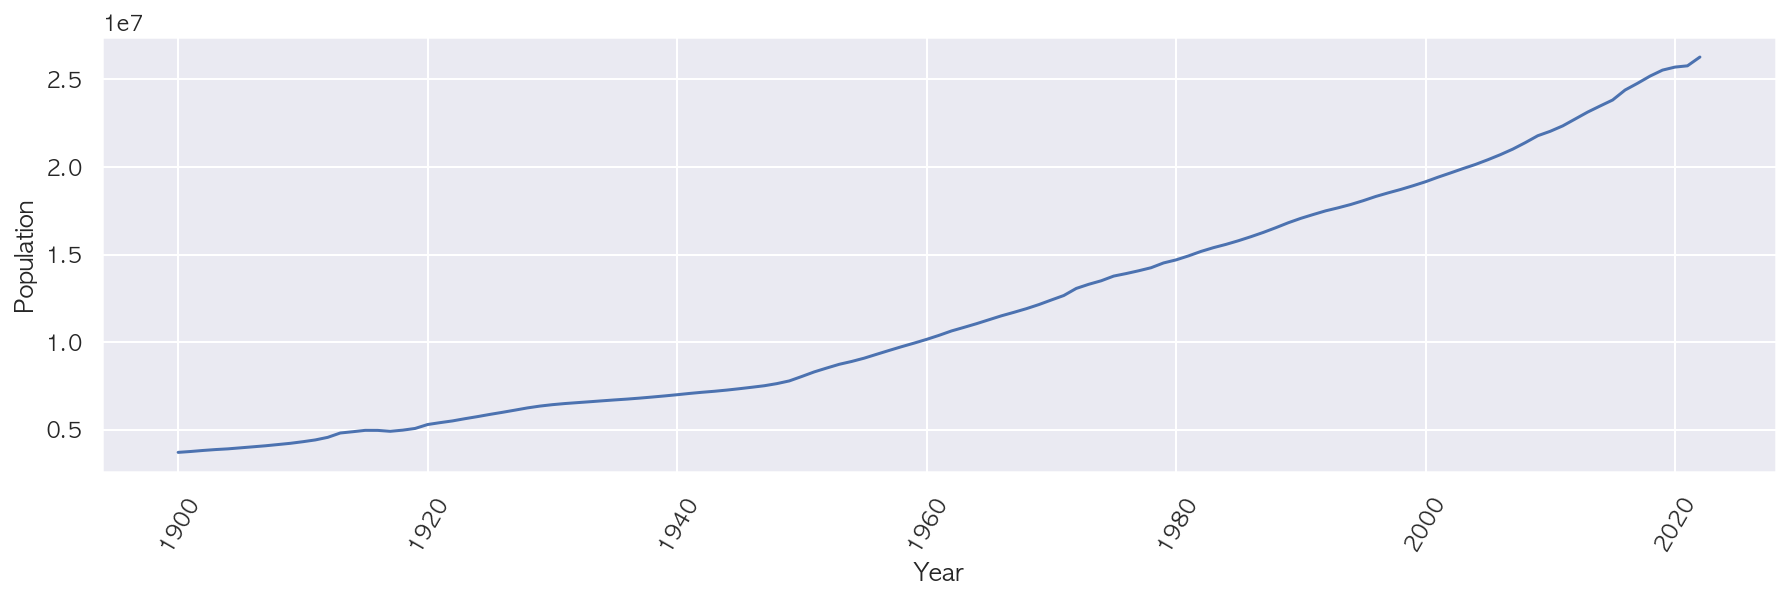

In [152]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=60)
sns.lineplot(data=df, x='Year', y='Population')